[[[255 217 240]
  [228 177 197]
  [149 101 119]
  ...
  [237 214 188]
  [237 214 188]
  [237 214 188]]

 [[254 200 223]
  [172 121 141]
  [145  97 115]
  ...
  [237 214 188]
  [237 214 188]
  [237 214 188]]

 [[202 151 171]
  [155 107 125]
  [159 114 130]
  ...
  [237 214 188]
  [237 214 188]
  [237 214 188]]

 ...

 [[188 176 158]
  [189 177 159]
  [181 169 151]
  ...
  [150 137 121]
  [155 143 125]
  [113 101  83]]

 [[212 199 183]
  [189 176 160]
  [179 166 150]
  ...
  [136 123 107]
  [147 135 117]
  [144 132 114]]

 [[157 144 128]
  [167 154 138]
  [184 171 155]
  ...
  [185 172 156]
  [156 144 126]
  [158 146 128]]]


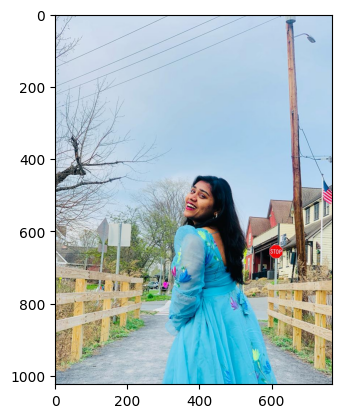

In [1]:
#packages to import
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Loading the image using cv2
img = cv2.imread("C:\\Users\\Meghana Golla\\OneDrive\\part2.png")
#RGB color space to the BGR color space.
print(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#Displaying the image
plt.imshow(img)

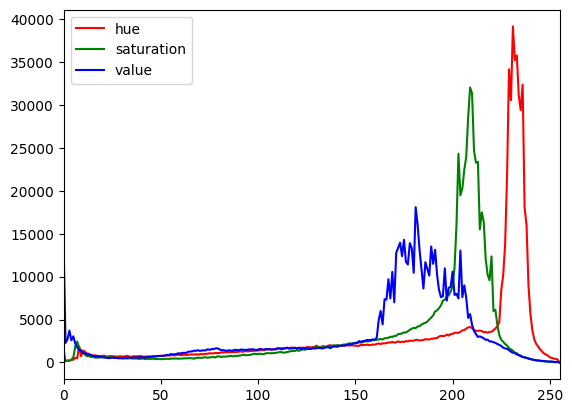

In [2]:
#BGR color space to the RGB color space.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#calculate the histogram of pixel intensities
hist = cv2.calcHist([img],[0],None,[256],[0,255])

#line plot of the histogram with red color
plt.plot(hist, color='red')
#sets the x-axis limits of the plot
plt.xlim([0,255])

#histogram of pixel intensities
hist = cv2.calcHist([img],[1],None,[256],[0,255])
#line plot of the histogram with green color
plt.plot(hist, color='green')
#sets the x-axis limits of the plot
plt.xlim([0,255])


hist = cv2.calcHist([img],[2],None,[256],[0,255])
#creates a line plot of the histogram with blue color
plt.plot(hist, color='blue')
#sets the x-axis limits of the plot
plt.xlim([0,255])

#adding legend to the graph with location as upper left
plt.legend(('hue','saturation','value'), loc = 'upper left')
#Displaying the image
plt.show()

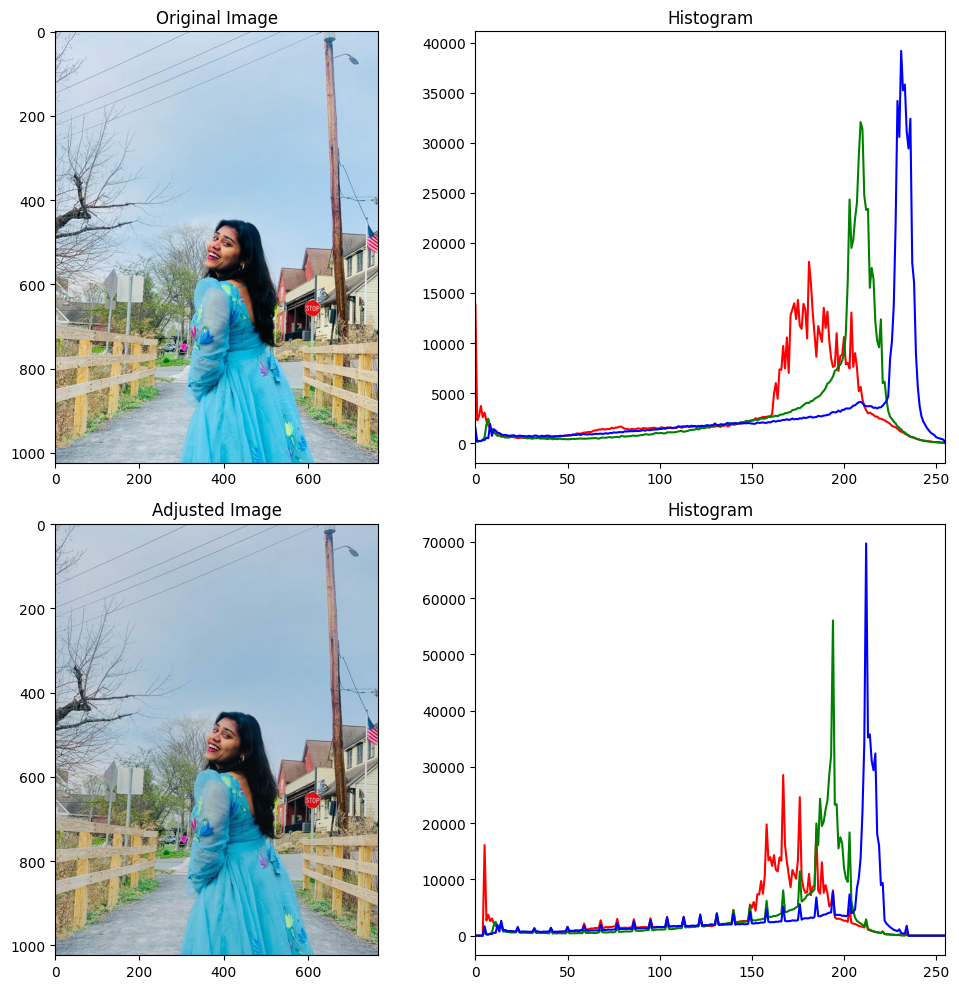

In [3]:
#function to adjust brightness and contrast
def adjust_brightness_contrast(image_array, alpha, beta):
    temp = image_array.astype('float32')
    temp *= alpha
    temp += beta
    temp = np.clip(temp, 0, 255)
    return temp.astype('uint8')

#Reading the image
img = cv2.imread("C:\\Users\\Meghana Golla\\OneDrive\\part2.png")
#Converting image frim BGR to RGB colorspace
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#specifying figure size
plt.figure(figsize=(10,10))
#creating a subplot within a grid of subplots
plt.subplot(2, 2, 1)
plt.imshow(img)
#Setting title of the image
plt.title('Original Image')

hist = cv2.calcHist([img],[0],None,[256],[0,255])
plt.subplot(2, 2, 2)
plt.plot(hist,color="red")
plt.xlim([0,255])
hist = cv2.calcHist([img],[1],None,[256],[0,255])
plt.subplot(2, 2, 2)
plt.plot(hist,color="green")
plt.xlim([0,255])

hist = cv2.calcHist([img],[2],None,[256],[0,255])
plt.subplot(2, 2, 2)
plt.plot(hist,color="blue")
plt.xlim([0,255])
plt.title('Histogram')

#adjust image by calling the function with the values passed as parameters
adjusted_img = adjust_brightness_contrast(img, .9, 5)

#Plotting for adjusted image
plt.subplot(2, 2, 3)
plt.imshow(adjusted_img, vmin=0, vmax=255)
plt.title('Adjusted Image')

adjusted_hist = cv2.calcHist([adjusted_img],[0],None,[256],[0,255])
plt.subplot(2, 2, 4)
plt.plot(adjusted_hist,color="red")
plt.xlim([0,255])
adjusted_hist = cv2.calcHist([adjusted_img],[1],None,[256],[0,255])
plt.subplot(2, 2, 4)
plt.plot(adjusted_hist,color="green")
plt.xlim([0,255])

adjusted_hist = cv2.calcHist([adjusted_img],[2],None,[256],[0,255])
plt.subplot(2, 2, 4)
plt.plot(adjusted_hist,color="blue")
plt.xlim([0,255])
plt.title('Histogram')

plt.tight_layout()
#Displaying the image
plt.show()


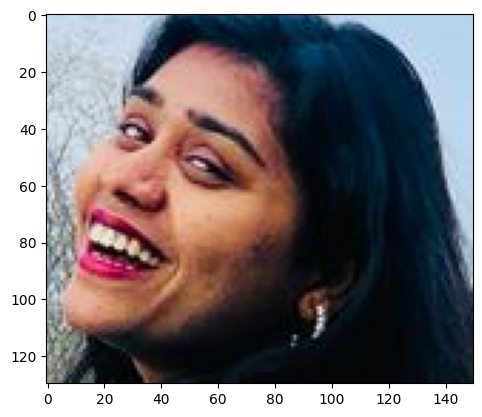

In [4]:
#need to maskout face for original image or modified image
#top_left = (350,450)
#bottom_right = (500,580)
#rect_color = (255,0,0)
#thickness = 10
#img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)
img = cv2.imread("C:\\Users\\Meghana Golla\\OneDrive\\part2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Using slicing to mask the image
img_masked=img[450:580,350:500]
#Displaying the image
plt.imshow(img_masked)

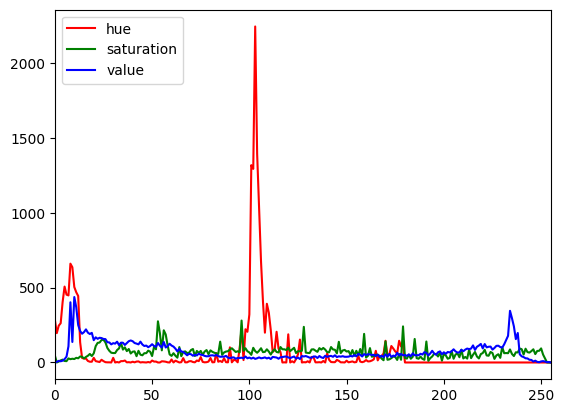

In [5]:
#Converting Image from RGB to HSV
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)

#Creating histogram for the masked image
#Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis
plt.xlim([0,255])

#saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis
plt.xlim([0,255])

#value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis
plt.xlim([0,255])

plt.legend(('hue','saturation','value'), loc = 'upper left')
#Displaying the image
plt.show()

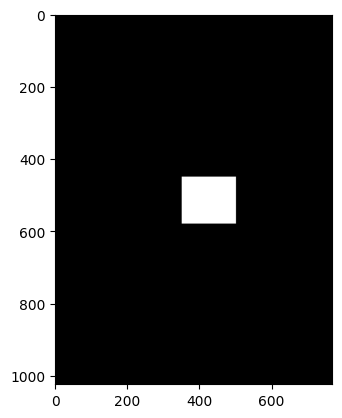

In [6]:
#how to Create an empty 2D array filled with zeros the same shape as our image
mask=np.zeros(img.shape[:2],np.uint8)
# and then now Set the masked to white
mask[450:580,350:500]=255
#later i show below how to Displaying the mask and Make sure you tell matplotlib that you it only contains gray values.  
plt.imshow(mask,cmap="gray")

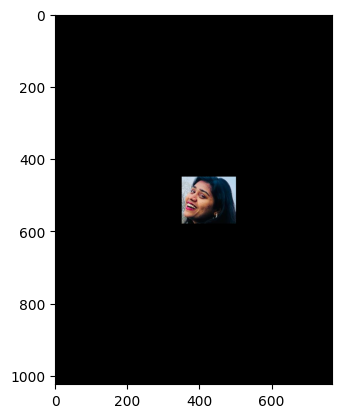

In [7]:
img=cv2.imread("C:\\Users\\Meghana Golla\\OneDrive\\part2.png")
# Convert our image to RGB
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#Using Bitwise between two images and using Mask 
img_masked=cv2.bitwise_and(img,img,mask=mask)
#Displaying the image
plt.imshow(img_masked)

(0.0, 255.0)

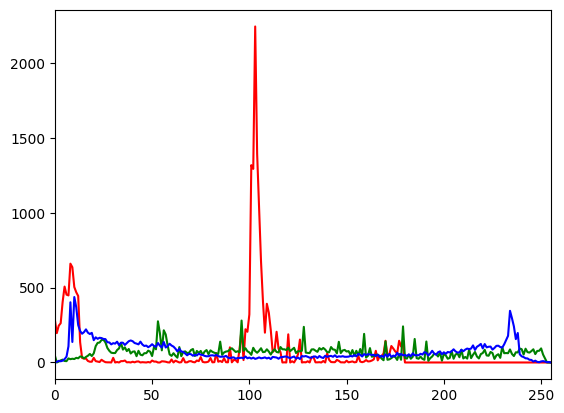

In [8]:
# Create a histogram of HSV values.
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Hue
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis
plt.xlim([0,255])

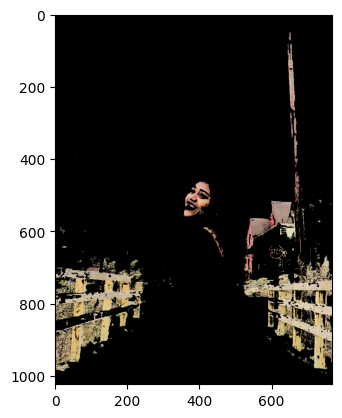

In [9]:
img=cv2.imread("C:\\Users\\Meghana Golla\\OneDrive\\part2.png")
#Convert to RGB from BGR
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#Convert to HSV from RGB
img_hsv=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#Minimum HSV values
min_HSV = np.array([0,40,140], np.uint8)
#Maximum HSV values
max_HSV = np.array([30,150,255], np.uint8)

#creating a binary mask that isolates a specific range of colors in an image in the HSV (Hue, Saturation, Value) color space
skin_Area = cv2.inRange(img_hsv, min_HSV, max_HSV)

#using bitwise AND operation between two images and using mask
skin_HSV = cv2.bitwise_and(img_hsv, img_hsv, mask=skin_Area)
#Conerting from HSV to RGB
skin_HSV = cv2.cvtColor(skin_HSV, cv2.COLOR_HSV2RGB)
#plotting the segmented image
plt.imshow(skin_HSV)